In [142]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
from keras.utils import to_categorical

In [143]:
#Loading the diabetes dataset
diabetes_data = pd.read_csv('diabetes.csv')

In [144]:
#Viewing the first few records of the dataset
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [145]:
#Viewing various information about our dataset such as columns,  their types, etc.
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [146]:
#viewing the summary stats about numerical features in our dataset
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [147]:
# Checking for missing values in the dataset
missing_values = diabetes_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


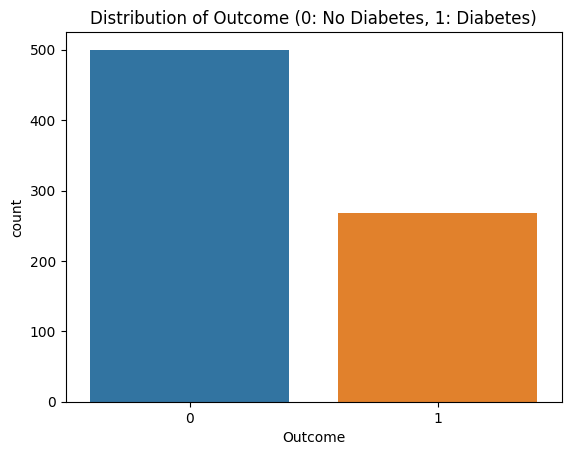

In [148]:
# Visualizing the distribution of the target variable 'Outcome'
sns.countplot(x='Outcome', data=diabetes_data)
plt.title('Distribution of Outcome (0: No Diabetes, 1: Diabetes)')
plt.show()

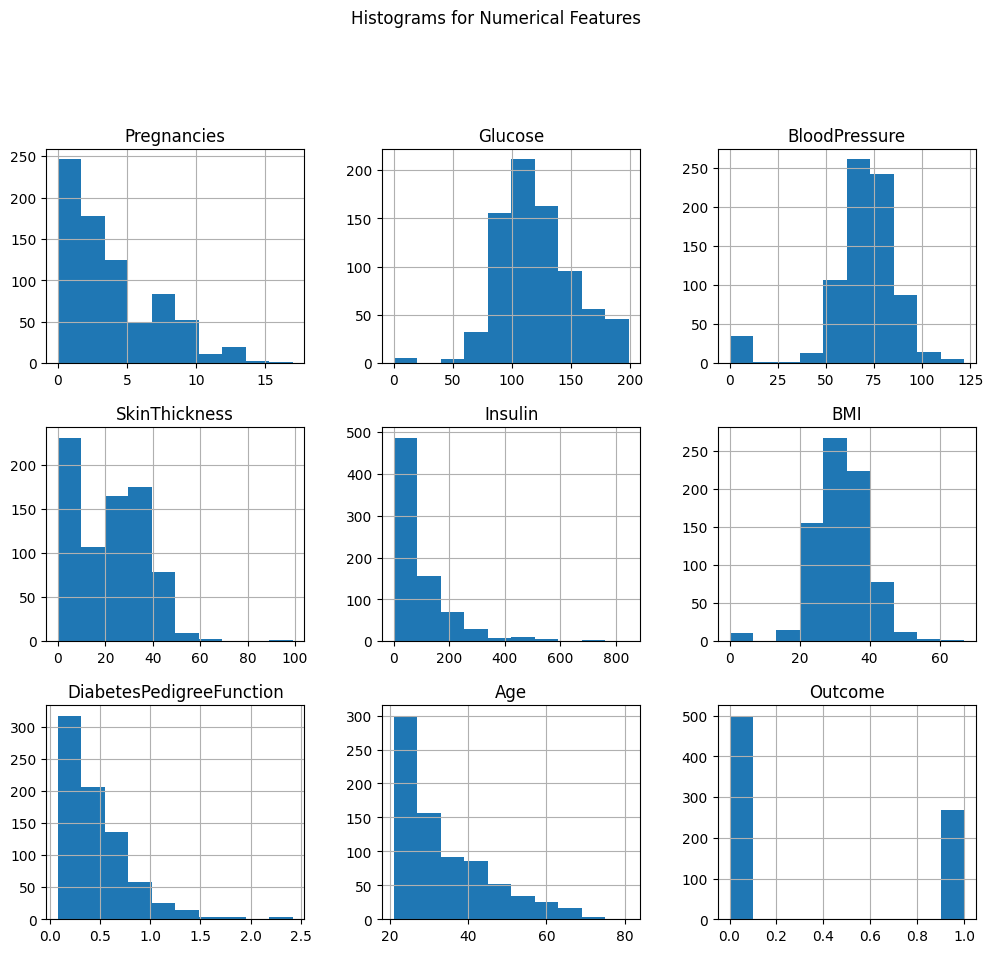

In [149]:
# Histograms for numerical features
diabetes_data.hist(figsize=(12, 10))
plt.suptitle("Histograms for Numerical Features", y=1.02)
plt.show()

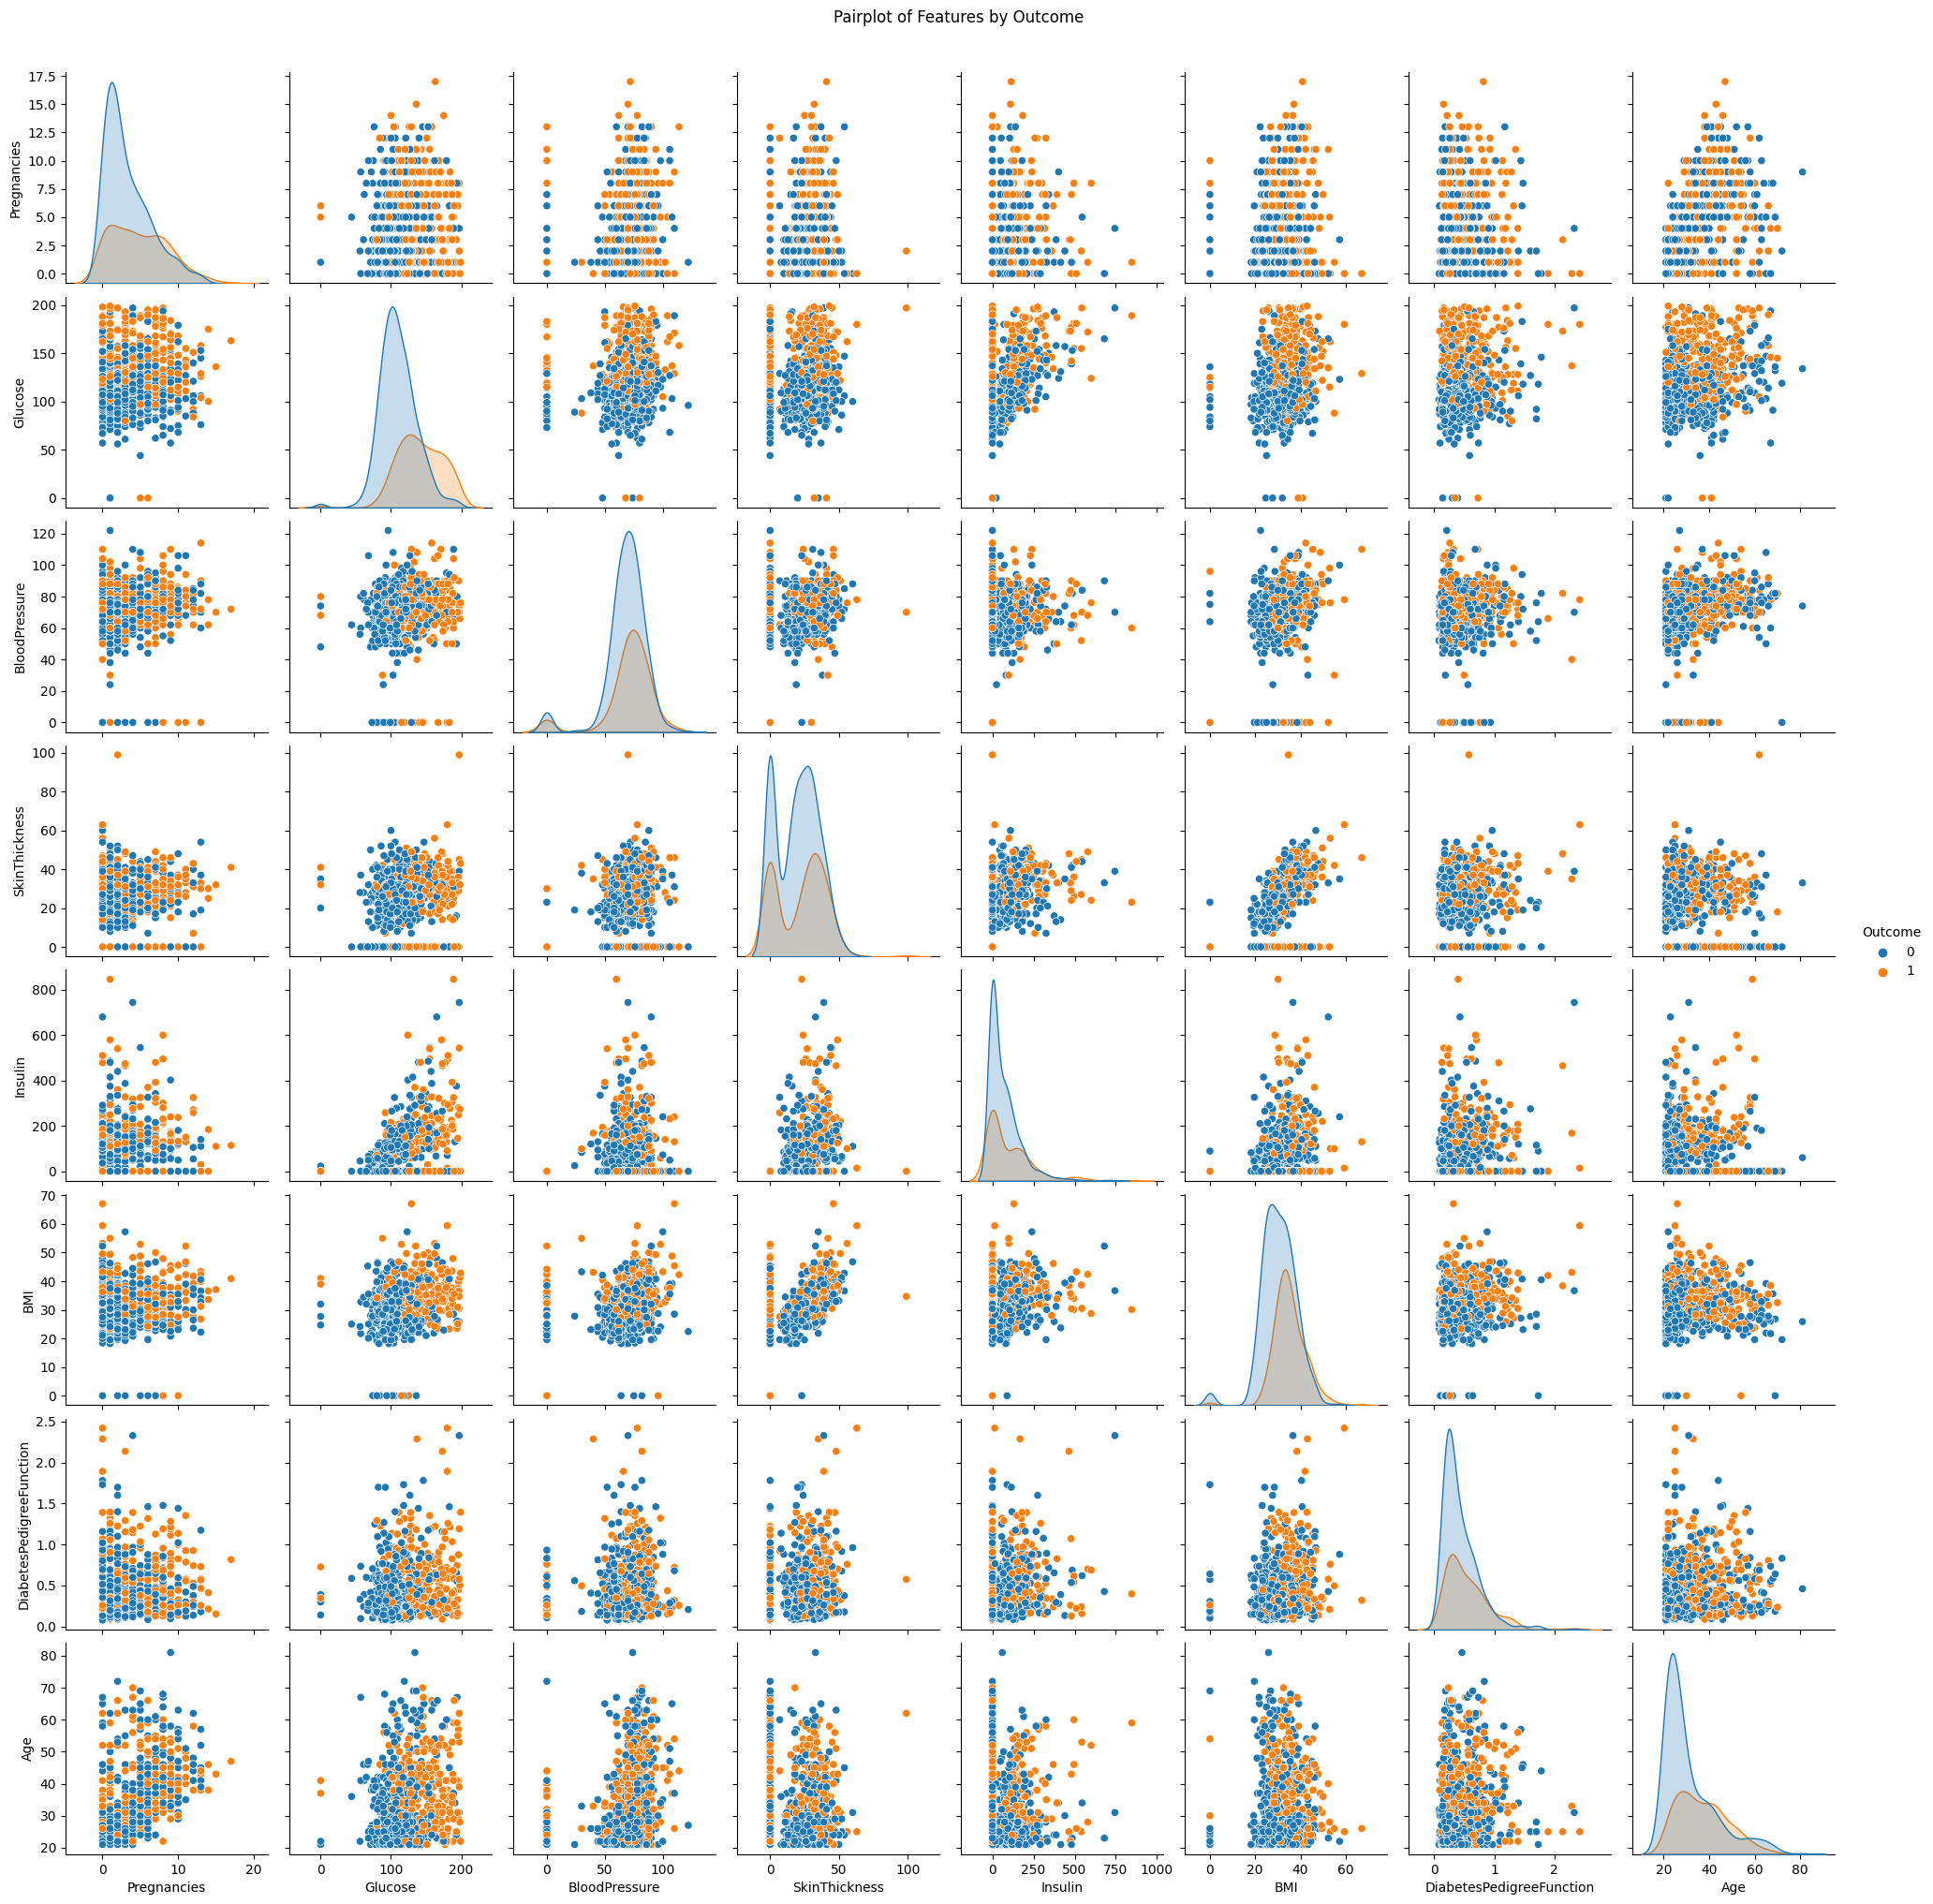

In [150]:
#Visualizing Pairplot analysis
sns.pairplot(diabetes_data, hue='Outcome', diag_kind='kde')
plt.suptitle("Pairplot of Features by Outcome", y=1.02)
plt.show()

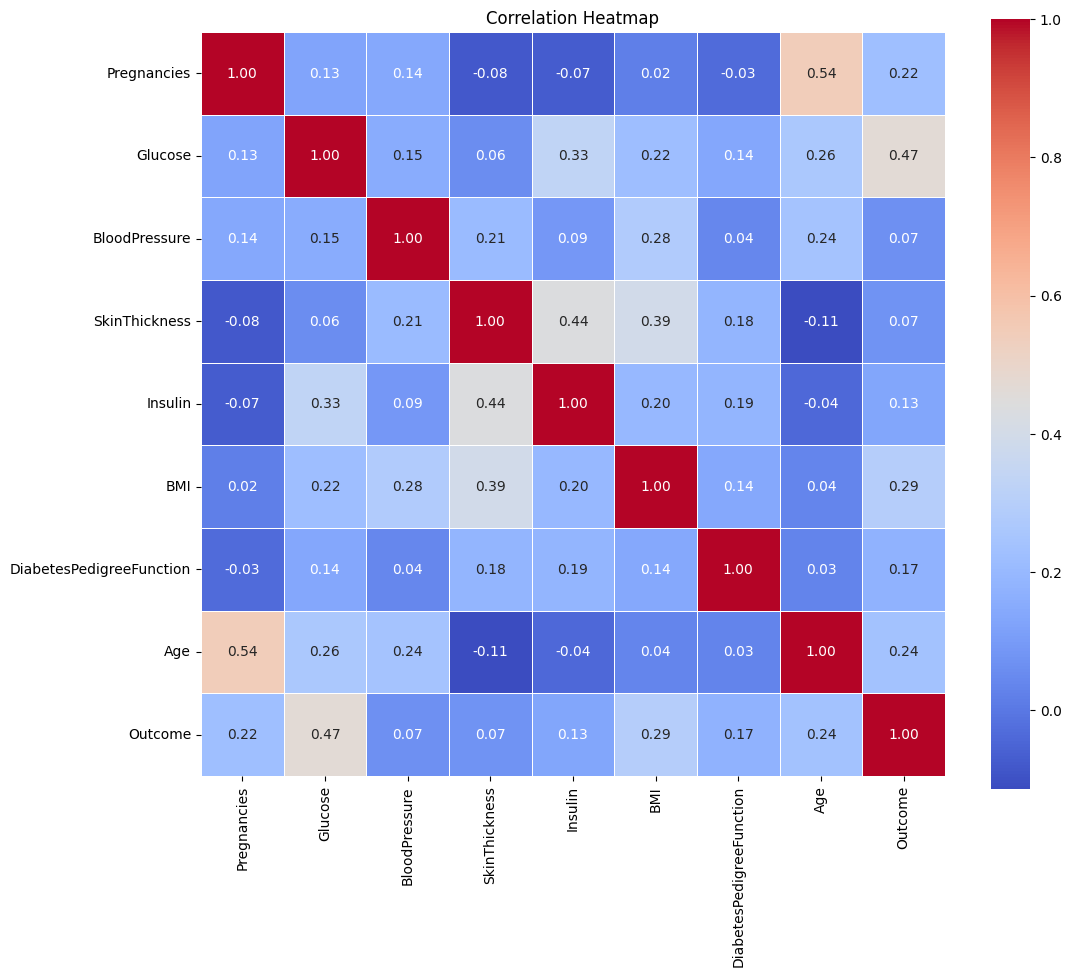

In [151]:
#Visualizing Correlation heatmap
correlation_matrix = diabetes_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Heatmap")
plt.show()

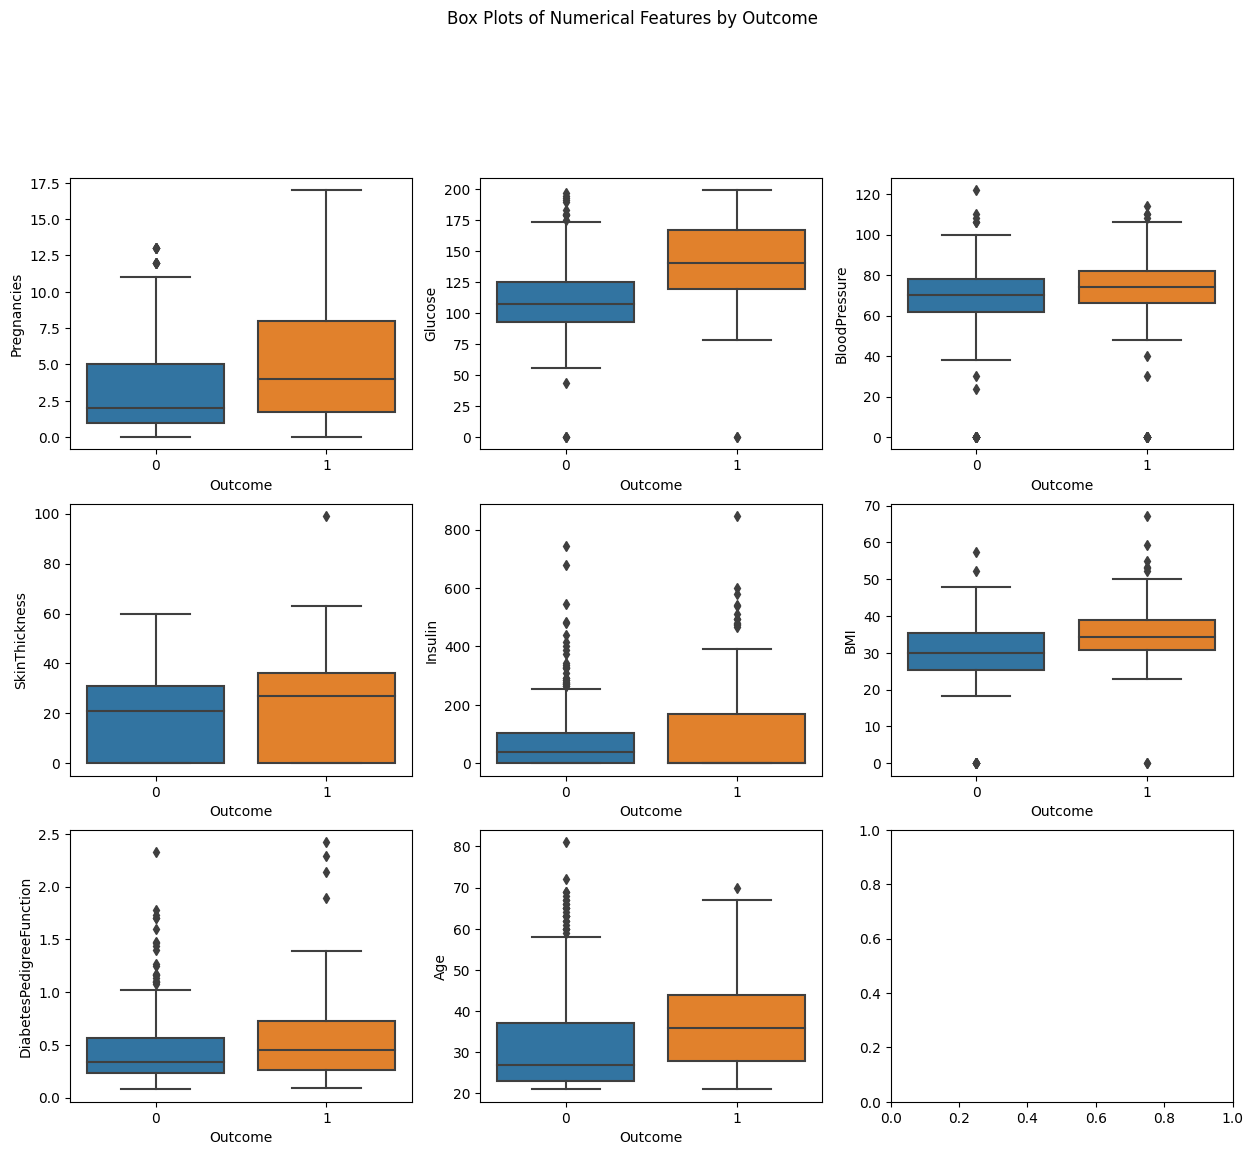

In [152]:
#Visualizing Box Plots for numerical features by Outcome
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, column in enumerate(diabetes_data.columns[:-1]):
    sns.boxplot(x='Outcome', y=column, data=diabetes_data, ax=axes[i // 3, i % 3])

fig.suptitle("Box Plots of Numerical Features by Outcome", y=1.02)
plt.show()

In [153]:
# Splitting the data into features (X) and target variable (y)
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [154]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [155]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [156]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [157]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [158]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165,88,0,0,30.4,0.302,49
534,1,77,56,30,56,33.3,1.251,24
344,8,95,72,0,0,36.8,0.485,57
296,2,146,70,38,360,28.0,0.337,29


In [159]:
#Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [160]:
print(X_train_scaled)

[[-0.52639686 -1.15139792 -3.75268255 ... -4.13525578 -0.49073479
  -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485 ... -0.48916881  2.41502991
   1.48710085]
 [-0.82846011  0.56687102 -1.2658623  ... -0.42452187  0.54916055
  -0.94893896]
 ...
 [ 1.8901091  -0.62029661  0.89659009 ...  1.76054443  1.981245
   0.44308379]
 [-1.13052335  0.62935353 -3.75268255 ...  1.34680407 -0.78487662
  -0.33992901]
 [-1.13052335  0.12949347  1.43720319 ... -1.22614383 -0.61552223
  -1.03594038]]


In [161]:
print(X_test_scaled)

[[ 0.68185612 -0.71402038 -0.61712658 ...  0.26073561 -0.11637247
   0.87809089]
 [-0.52639686 -0.27664283  0.30191569 ...  0.48053518 -0.954231
  -1.03594038]
 [-0.52639686 -0.40160784 -0.29275872 ... -0.15300476 -0.9245197
  -1.03594038]
 ...
 [ 1.28598261 -0.80774414  0.13973176 ...  0.62275843  0.04703966
   2.0961108 ]
 [-0.52639686  0.78555979  0.03160914 ... -0.51502758 -0.39268751
  -0.33992901]
 [ 1.28598261 -1.46381046  0.03160914 ...  0.42881763  0.70068816
   0.53008521]]


In [162]:
#Implementing Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

In [163]:
# Implementing SVM Classifier
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_scaled, y_train)
svm_predictions = svm_classifier.predict(X_test_scaled)

In [164]:
#Preparing the dataset for LSTM
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Reshaping the data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [165]:
#Building the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [166]:
#Training the LSTM model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
20/20 [==============================] - 4s 53ms/step - loss: 0.6698 - accuracy: 0.6531 - val_loss: 0.6260 - val_accuracy: 0.7078
Epoch 2/50
20/20 [==============================] - 0s 8ms/step - loss: 0.5986 - accuracy: 0.7280 - val_loss: 0.5507 - val_accuracy: 0.7338
Epoch 3/50
20/20 [==============================] - 0s 8ms/step - loss: 0.5633 - accuracy: 0.7215 - val_loss: 0.5464 - val_accuracy: 0.7273
Epoch 4/50
20/20 [==============================] - 0s 8ms/step - loss: 0.5567 - accuracy: 0.7248 - val_loss: 0.5414 - val_accuracy: 0.7208
Epoch 5/50
20/20 [==============================] - 0s 9ms/step - loss: 0.5557 - accuracy: 0.7296 - val_loss: 0.5379 - val_accuracy: 0.7208
Epoch 6/50
20/20 [==============================] - 0s 8ms/step - loss: 0.5520 - accuracy: 0.7248 - val_loss: 0.5361 - val_accuracy: 0.7208
Epoch 7/50
20/20 [==============================] - 0s 9ms/step - loss: 0.5505 - accuracy: 0.7264 - val_loss: 0.5407 - val_accuracy: 0.7208
Epoch 8/50
20/20 [=

In [167]:
#Predictions on the LSTM model
y_pred = (model.predict(X_test) > 0.5).astype('int32')

5/5 [==============================] - 0s 4ms/step


In [168]:
#Setting the number of folds for Kfold
num_folds = 10

In [169]:
# Reset index of the DataFrame
diabetes_data.reset_index(drop=True, inplace=True)

In [170]:
#Initializing the stratified k-fold object
stratkf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

In [171]:
#Defining a function to calculate metrics from confusion matrix
def calculate_metrics(cm):
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]

    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    npv = tn / (tn + fn) if (tn + fn) != 0 else 0

    tpr = sensitivity
    fpr = 1 - specificity
    fnr = 1 - sensitivity
    tnr = specificity

    accuracy = (tp + tn) / np.sum(cm)
    f1_score = (2 * precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0

    return {
        'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn,
        'Sensitivity': sensitivity, 'Specificity': specificity,
        'Precision': precision, 'NPV': npv,
        'TPR': tpr, 'FPR': fpr, 'FNR': fnr, 'TNR': tnr,
        'Accuracy': accuracy, 'F1 Score': f1_score
    }

In [172]:
# #Initializing variables to store evaluation metrics for each algorithm
rf_metrics = {k: 0 for k in calculate_metrics(np.array([[0, 0], [0, 0]]))}
svm_metrics = {k: 0 for k in calculate_metrics(np.array([[0, 0], [0, 0]]))}
lstm_metrics = {k: 0 for k in calculate_metrics(np.array([[0, 0], [0, 0]]))}

<ipython-input-171-d892e6b74253>:18: RuntimeWarning: invalid value encountered in long_scalars
  accuracy = (tp + tn) / np.sum(cm)


In [173]:
#Performing 10-fold cross-validation for SVM
for train_index, test_index in stratkf.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[test_index]

    #Training the SVM model on the current fold
    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(X_train_fold, y_train_fold)

    #Making predictions on the validation set
    y_pred_fold = svm_model.predict(X_val_fold)

    #Resetting index for evaluation
    y_val_fold.reset_index(drop=True, inplace=True)

    #Evaluating the model on the current fold
    cm = confusion_matrix(y_val_fold, y_pred_fold)
    svm_metrics = {k: svm_metrics[k] + v for k, v in calculate_metrics(cm).items()}


In [174]:
#Performing 10-fold cross-validation for LSTM (simple feedforward neural network)
for train_index, test_index in stratkf.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[test_index]

    #Training the LSTM model (simple feedforward neural network) on the current fold
    lstm_model = Sequential()
    lstm_model.add(Dense(10, input_dim=X_train_fold.shape[1], activation='relu'))
    lstm_model.add(Dense(1, activation='sigmoid'))
    lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    lstm_model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)

    #Making predictions on the validation set
    y_pred_fold = (lstm_model.predict(X_val_fold) > 0.5).astype('int32')

    #Resetting index for evaluation
    y_val_fold.reset_index(drop=True, inplace=True)

    #Evaluating the model on the current fold
    cm = confusion_matrix(y_val_fold, y_pred_fold)
    lstm_metrics = {k: lstm_metrics[k] + v for k, v in calculate_metrics(cm).items()}


3/3 [==============================] - 0s 4ms/step


In [175]:
# Calculating average metrics for each model
rf_avg_metrics = {k: v / 10 for k, v in rf_metrics.items()}
svm_avg_metrics = {k: v / 10 for k, v in svm_metrics.items()}
lstm_avg_metrics = {k: v / 10 for k, v in lstm_metrics.items()}

# Displaying the results
print("Random Forest Metrics:")
print(rf_avg_metrics)

print("\nSVM Metrics:")
print(svm_avg_metrics)

print("\nLSTM Metrics:")
print(lstm_avg_metrics)

Random Forest Metrics:
{'TP': 0.0, 'TN': 0.0, 'FP': 0.0, 'FN': 0.0, 'Sensitivity': 0.0, 'Specificity': 0.0, 'Precision': 0.0, 'NPV': 0.0, 'TPR': 0.0, 'FPR': 0.0, 'FNR': 0.0, 'TNR': 0.0, 'Accuracy': 0.0, 'F1 Score': 0.0}

SVM Metrics:
{'TP': 15.4, 'TN': 43.8, 'FP': 6.2, 'FN': 11.4, 'Sensitivity': 0.5749287749287749, 'Specificity': 0.876, 'Precision': 0.7272573598777392, 'NPV': 0.7951814381600174, 'TPR': 0.5749287749287749, 'FPR': 0.12400000000000003, 'FNR': 0.4250712250712251, 'TNR': 0.876, 'Accuracy': 0.7707792207792208, 'F1 Score': 0.6349028745180703}

LSTM Metrics:
{'TP': 13.3, 'TN': 37.9, 'FP': 12.1, 'FN': 13.5, 'Sensitivity': 0.4955840455840456, 'Specificity': 0.758, 'Precision': 0.5349645515774548, 'NPV': 0.7390810995612787, 'TPR': 0.4955840455840456, 'FPR': 0.242, 'FNR': 0.5044159544159544, 'TNR': 0.758, 'Accuracy': 0.6667464114832534, 'F1 Score': 0.505526415390867}


In [176]:
#Initializing classifiers
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()

classifiers = {'Random Forest': rf_classifier, 'SVM': svm_classifier}

#Creating a DataFrame to store the results
results_df = pd.DataFrame(columns=['Classifier', 'Run', 'TP', 'TN', 'FP', 'FN', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

#Initializing StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Running the classifiers on each fold
for classifier_name, classifier in classifiers.items():
    for run, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        #Calculating confusion matrix manually
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        #Calculating other metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        #Appending results to DataFrame
        results_df = results_df.append({
            'Classifier': classifier_name,
            'Run': run,
            'TP': tp,
            'TN': tn,
            'FP': fp,
            'FN': fn,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }, ignore_index=True)

#Displaying the results
print("Results for each run:")
print(results_df)

#Calculating and display average results
average_results = results_df.groupby('Classifier').mean().reset_index()
print("\nAverage results across all runs:")
print(average_results)


<ipython-input-176-8e4a169439f0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-176-8e4a169439f0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-176-8e4a169439f0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-176-8e4a169439f0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-176-8e4a169439f0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_

Results for each run:
       Classifier Run  TP  TN  FP  FN  Accuracy  Precision    Recall  F1 Score
0   Random Forest   1  18  44   6   9  0.805195   0.750000  0.666667  0.705882
1   Random Forest   2  15  44   6  12  0.766234   0.714286  0.555556  0.625000
2   Random Forest   3  15  40  10  12  0.714286   0.600000  0.555556  0.576923
3   Random Forest   4  19  46   4   8  0.844156   0.826087  0.703704  0.760000
4   Random Forest   5  21  45   5   6  0.857143   0.807692  0.777778  0.792453
5   Random Forest   6  14  43   7  13  0.740260   0.666667  0.518519  0.583333
6   Random Forest   7  14  43   7  13  0.740260   0.666667  0.518519  0.583333
7   Random Forest   8  17  41   9  10  0.753247   0.653846  0.629630  0.641509
8   Random Forest   9  20  40  10   6  0.789474   0.666667  0.769231  0.714286
9   Random Forest  10  12  39  11  14  0.671053   0.521739  0.461538  0.489796
10            SVM   1  13  47   3  14  0.779221   0.812500  0.481481  0.604651
11            SVM   2  11  46 

<ipython-input-176-8e4a169439f0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-176-8e4a169439f0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-176-8e4a169439f0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-176-8e4a169439f0>:50: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_results = results_df.groupby('Classifier').mean().reset_index()


In [177]:
#Converting labels to one-hot encoding
y_one_hot = to_categorical(y)

#Initializing LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(100, input_shape=(X.shape[1], 1)))
lstm_model.add(Dense(2, activation='softmax'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Creating a DataFrame to store the results
results_df_lstm = pd.DataFrame(columns=['Classifier', 'Run', 'TP', 'TN', 'FP', 'FN', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

#Initializing StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Running the LSTM model on each fold
for run, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_one_hot[train_index], y_one_hot[test_index]

    #Reshaping the input data for LSTM
    X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
    X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

    lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=0)
    y_pred_probs = lstm_model.predict(X_test_lstm)
    y_pred = np.argmax(y_pred_probs, axis=1)

    #Calculating confusion matrix manually
    tn, fp, fn, tp = confusion_matrix(np.argmax(y_test, axis=1), y_pred).ravel()

    #Calculating other metrics
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    precision = precision_score(np.argmax(y_test, axis=1), y_pred)
    recall = recall_score(np.argmax(y_test, axis=1), y_pred)
    f1 = f1_score(np.argmax(y_test, axis=1), y_pred)

    #Appending results to DataFrame
    results_df_lstm = results_df_lstm.append({
        'Classifier': 'LSTM',
        'Run': run,
        'TP': tp,
        'TN': tn,
        'FP': fp,
        'FN': fn,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

#Displaying the results for LSTM
print("Results for each run (LSTM):")
print(results_df_lstm)

#Calculating and display average results for LSTM
average_results_lstm = results_df_lstm.groupby('Classifier').mean().reset_index()
print("\nAverage results across all runs (LSTM):")
print(average_results_lstm)


3/3 [==============================] - 0s 6ms/step


<ipython-input-177-cdb3ca354002>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_lstm = results_df_lstm.append({


3/3 [==============================] - 0s 5ms/step


<ipython-input-177-cdb3ca354002>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_lstm = results_df_lstm.append({


3/3 [==============================] - 0s 5ms/step


<ipython-input-177-cdb3ca354002>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_lstm = results_df_lstm.append({


3/3 [==============================] - 0s 6ms/step


<ipython-input-177-cdb3ca354002>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_lstm = results_df_lstm.append({


3/3 [==============================] - 0s 6ms/step


<ipython-input-177-cdb3ca354002>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_lstm = results_df_lstm.append({


3/3 [==============================] - 0s 6ms/step


<ipython-input-177-cdb3ca354002>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_lstm = results_df_lstm.append({


3/3 [==============================] - 0s 11ms/step


<ipython-input-177-cdb3ca354002>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_lstm = results_df_lstm.append({


3/3 [==============================] - 0s 5ms/step


<ipython-input-177-cdb3ca354002>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_lstm = results_df_lstm.append({


3/3 [==============================] - 0s 5ms/step


<ipython-input-177-cdb3ca354002>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_lstm = results_df_lstm.append({


3/3 [==============================] - 0s 6ms/step
Results for each run (LSTM):
  Classifier Run  TP  TN  FP  FN  Accuracy  Precision    Recall  F1 Score
0       LSTM   1   8  44   6  19  0.675325   0.571429  0.296296  0.390244
1       LSTM   2   7  46   4  20  0.688312   0.636364  0.259259  0.368421
2       LSTM   3  10  46   4  17  0.727273   0.714286  0.370370  0.487805
3       LSTM   4  16  46   4  11  0.805195   0.800000  0.592593  0.680851
4       LSTM   5  21  38  12   6  0.766234   0.636364  0.777778  0.700000
5       LSTM   6  17  43   7  10  0.779221   0.708333  0.629630  0.666667
6       LSTM   7  17  43   7  10  0.779221   0.708333  0.629630  0.666667
7       LSTM   8  17  42   8  10  0.766234   0.680000  0.629630  0.653846
8       LSTM   9  23  37  13   3  0.789474   0.638889  0.884615  0.741935
9       LSTM  10  17  41   9   9  0.763158   0.653846  0.653846  0.653846

Average results across all runs (LSTM):
  Classifier  Accuracy  Precision    Recall  F1 Score
0       LST

<ipython-input-177-cdb3ca354002>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_lstm = results_df_lstm.append({
<ipython-input-177-cdb3ca354002>:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_results_lstm = results_df_lstm.groupby('Classifier').mean().reset_index()
